# Tarea 9: Máxima verosimilitud y bootstrap paramétrico

Sean $X_1,...X_n \backsim N(\mu,1)$ y $\theta = e^{\mu}$. Simula una muestra de tamaño $n=100$ usando $\mu=5$.
* Usa bootstrap paramétrico para construir un intervalo del $95\%$  de confianza.
* Usa bootstrap no paramétrico y compara tus respuestas.
* Realiza un histograma de replicaciones boostrap para cada método, estas son estimaciones de la distribución $\hat{\theta}$. Compáralos con la verdadera distribución de $\hat{\theta}$ (que puedes obtener vía simulación). ¿Cuál es la aproximación más cercana a la verdadera distribución?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Simulando** datos de una distribución normal $N(5,1)$

In [2]:
from scipy.stats import norm, probplot

In [3]:
#Simulaciones
n = 100
mu = 5
sigma = 1 
X = norm.rvs(loc=mu, scale=sigma, size=n)

# Boostrap paramétrico

## Distribución de los datos

En este caso, se sabe que los datos fueron generados de una distribución normal $N(5,1)$, sin embargo, se realizan todos los pasos para determinar el estimador por máxima verosimilitud.

Empezamos por visualizar la distribución de los datos

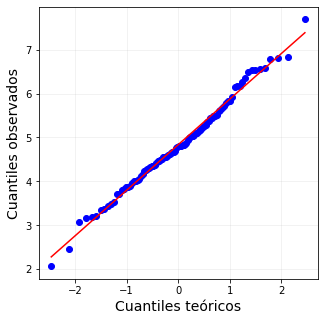

In [4]:
fig, ax = plt.subplots(figsize=(5,5))

#Gráfica cuantil-cuantil normal
probplot(x=X, plot=ax)
ax.set_title('')
ax.set_xlabel('Cuantiles teóricos', fontsize=14)
ax.set_ylabel('Cuantiles observados', fontsize=14)
ax.grid(alpha=0.2)

plt.show()

**Observamos** que los datos son aproximadamente normales

## Estimador puntual

Recordando que la función de densidad de una distribución normal queda dada por: 
$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}{exp}\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$

Del problema conocemos que se tiene una $\sigma=1$, con lo que:
$$f(x) = \frac{1}{\sqrt{2\pi}}{exp}\left(-\frac{(x-\mu)^2}{2}\right)$$

Por lo tanto, suponiendo una V.A.I.I.D, entonces la función de distribución conjunta es:
$$L(x, \mu) = f(x_1, \mu)\cdot f(x_2, \mu)\cdot ...\cdot f(x_n, \mu)$$

Con lo cual:
$$L(x,\mu) = \frac{1}{\sqrt{2\pi}}{exp}\left(-\frac{(x_1-\mu)^2}{2}\right)\cdot \frac{1}{\sqrt{2\pi}}{exp}\left(-\frac{(x_2-\mu)^2}{2}\right)\cdot ...\cdot \frac{1}{\sqrt{2\pi}}{exp}\left(-\frac{(x_n-\mu)^2}{2}\right)$$

Es decir:
$$L(x,\mu) = \frac{n}{\sqrt{2\pi}}{exp}\left(\sum_{i=1}^{n} -\frac{(x_i-\mu)^2}{2}\right)$$

Aplicando el logaritmo natural, tenemos:
$$ln[L(x,\mu)] = ln\left(\frac{n}{\sqrt{2\pi}}\right) + ln\left({exp}\left(\sum_{i=1}^{n} -\frac{(x_i-\mu)^2}{2}\right) \right)$$

Que es igual a:
$$ln[L(x,\mu)] = ln\left(\frac{n}{\sqrt{2\pi}}\right) - \sum_{i=1}^{n} \frac{(x_i-\mu)^2}{2}$$

Derivando e igualando a cero:
$$\frac{d}{d\mu}ln[L(x,\mu)] = \sum_{i=1}^{n} (x_i-\mu) = 0$$
$$-n\mu + \sum_{i=1}^{n} x_i = 0$$

Entonces, el `estimador log-verosimilitud` es:
$$\mu = \frac{\sum_{i=1}^{n} x_i}{n} = \bar{x}$$

Con lo cual podemos calcular:

In [5]:
theta_bar = X.mean()
print(f"El estimador puntual es: {theta_bar:.4f}")

El estimador puntual es: 4.8333


## Simulaciones boostrap

**Paso 1**: Se genera un vector vacío de longitu $k$ simulaciones.

In [6]:
k = 10_000
boots_dist = np.arange(0, k)
boots_dist = np.vstack((boots_dist, np.zeros(shape=(k,)) )).T

boots_dist

array([[0.000e+00, 0.000e+00],
       [1.000e+00, 0.000e+00],
       [2.000e+00, 0.000e+00],
       ...,
       [9.997e+03, 0.000e+00],
       [9.998e+03, 0.000e+00],
       [9.999e+03, 0.000e+00]])

**Paso 2**: Se genera una función para replicaciones bootstrap.

In [7]:
def boots_sim(x): return norm.rvs(loc=theta_bar, scale=sigma, size=n).mean()

**Paso 3**: Se aplica la función a columna de ceros en `boots_dist`

In [8]:
boots_dist[:,1] = np.vectorize(boots_sim)(boots_dist[:,1])
boots_dist[:5]

array([[0.        , 4.67875775],
       [1.        , 4.87006324],
       [2.        , 4.85977084],
       [3.        , 4.61814868],
       [4.        , 4.76303691]])

## Reportando resultados

In [9]:
results = {'mle_param': [theta_bar],
           'boots_param': [boots_dist[:,1].mean()],
           'std_err': [boots_dist[:,1].std()],
           'left_lim': [boots_dist[:,1].mean() - 2*boots_dist[:,1].std()],
           'right_lim': [boots_dist[:,1].mean() + 2*boots_dist[:,1].std()]}

pd.DataFrame(results)

,mle_param,boots_param,std_err,left_lim,right_lim
0,4.833284,4.833212,0.10045,4.632312,5.034113


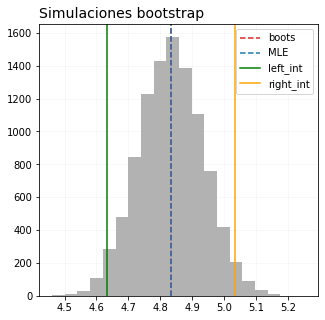

In [10]:
fig, ax = plt.subplots(figsize=(5,5))

#Contenido de figura
ax.hist(x=boots_dist[:,1], bins=20, color='grey', alpha=0.6)
ax.axvline(x=results['boots_param'], ymin=0, ymax=1, color='tab:red', linestyle='--', label='boots')
ax.axvline(x=results['mle_param'], ymin=0, ymax=1, color='tab:blue', linestyle='--', label='MLE')
ax.axvline(x=results['left_lim'], ymin=0, ymax=1, color='green', label='left_int')
ax.axvline(x=results['right_lim'], ymin=0, ymax=1, color='orange', label='right_int')


#Anotaciones y estilo
ax.set_title("Simulaciones bootstrap", fontsize=14, loc='left')
ax.grid(alpha=0.1)
ax.legend()

plt.show()